<h1><center>No-Show Appointments Project</center></h1>

## Introduction:
    In this project we are going to be exploring the no-show appointments dataset, posing questions to understand why 
    patients are not showing up for their appointments and how we can change that. We try to explore this by asking 3
    questions:
    
        1- Are scholarships an important factor deciding if the patients show up for the next appointment?
        2- What are the days with the most no-show cases?
        3- Are the text messages being sent to the patients effective? Do they bring more people to the appointment?
        4- Is there a correlation between no show rate & gender?
    
    It is not suggested in any way that one change in the variables explored directly result in another variable changing,
    this is just an exploration of the dataset and an attempt to find interesting findings from it

## Step 1: Importing relevant libraries and datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt



In [2]:
df = pd.read_csv('noshow.csv')

## Step 2: Checking data types & cleaning the data

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [3]:
### Since the dates in the df are formatted as strings, we will change them to dates
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay)
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay)

In [3]:
df.shape

(110527, 14)

In [4]:
### Checking to see if what we did worked
df['ScheduledDay'].dtypes, df['AppointmentDay'].dtypes

(datetime64[ns, UTC], datetime64[ns, UTC])

In [4]:
## Changing the noshow column name for easier analysis
df.rename(columns={'No-show': 'No_show'}, inplace=True)

### Checking nulls and duplicates:

In [5]:
df.duplicated().sum() ## No duplicated rows

0

In [6]:
df.isna().sum() ## No NaN values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
dtype: int64

In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df['AppointmentDayName'] = df['AppointmentDay'].dt.day_name() ### Creating a new column with the name of the day of the appointment

In [6]:
### Creating a new df to include only the no-show cases
df_noshow = df[df['No_show'] == 'Yes']

### Data cleaning summary:
    In the previous section, some changes were made to the data to make it more suitable for analysis
        1- ScheduledDay & AppointmentDay were changed from strings to dates because it's easier to work with them as
        dates than strings
        2- the column "No-show" was changed to "No_show" as i was getting an error working with it as "No-show"

## Step 3: Exploring the data further

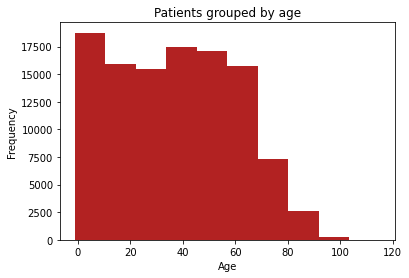

In [8]:
plt.hist(df['Age'], color='firebrick')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Patients grouped by age');

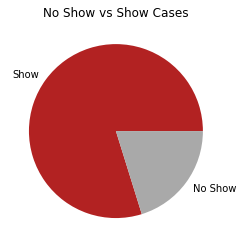

In [23]:
labels = ['Show', 'No Show']
plt.title('No Show vs Show Cases')
plt.pie(df['No_show'].value_counts(), labels=labels, colors=['firebrick','darkgray']);

##### This shows us that about 1 in 5 patients don't show up for their appointments, next we will try to explore the factors that lead to patients not showing up to their appointments

### Question 1: What are the days with the most no-show cases?

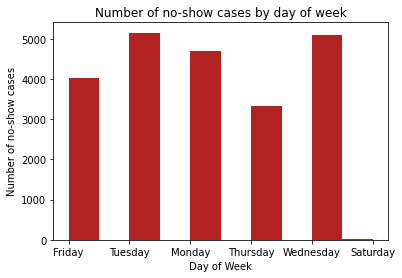

In [21]:
### Creating a histogram to show the days with the most and least no show cases
plt.hist(df_noshow['AppointmentDayName'], color='firebrick')
plt.xlabel('Day of Week')
plt.ylabel('Number of no-show cases')
plt.title('Number of no-show cases by day of week');

In [29]:
df_noshow[df_noshow['ScheduledtDayName'] == 'Saturday'].count()

PatientId             1
AppointmentID         1
Gender                1
ScheduledDay          1
AppointmentDay        1
Age                   1
Neighbourhood         1
Scholarship           1
Hipertension          1
Diabetes              1
Alcoholism            1
Handcap               1
SMS_received          1
No_show               1
ScheduledDayName      1
AppointmentDayName    1
dtype: int64

##### To create this histogram we used the dataframe that had the no show cases only, then we extracted the names of the days from the dates, now we know that Tuesday is the day with the most no-show cases, and Saturday is the day with the least.

### Question 2: Are scholarships an important factor deciding if the patients show up for the next appointment?

In [9]:
### Getting the counts of patients that have scholarships & those who don't in the no-show df
scholar = df_noshow['Scholarship'][df_noshow['Scholarship'] == 1].count()
no_scholar = df_noshow['Scholarship'][df_noshow['Scholarship'] == 0].count()


In [10]:
### dividing by the total number of scholarship & no scholarship to get the percentages
scholar /= df['Scholarship'][df['Scholarship'] == 1].count()
no_scholar /= df['Scholarship'][df['Scholarship'] == 0].count()

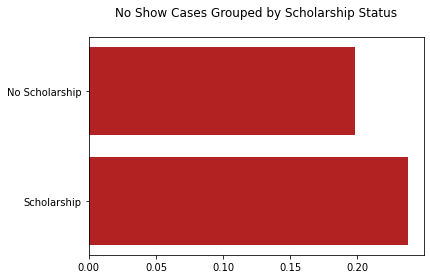

In [23]:
### Creating a bar chart to show the percentage of no show cases with scholarships vs no scholarships
mylabels = ['Scholarship', 'No Scholarship']
values = [scholar, no_scholar]
plt.barh(mylabels, width=values, color=['firebrick'])
plt.title('No Show Cases Grouped by Scholarship Status''\n');

In [12]:
scholar, no_scholar

(0.2373630420771568, 0.19807155900708365)

##### So, after analyzing the noshow data, we understand that having a scholarship doesn't mean the patient is more likely to show up to the next appointment, and that 23.7% of the patients that have scholarships don't show up, which is 4% more than people who don't have scholarships

### Question 3: Are the text messages sent to the patients effective? Do they bring more people to their appointments?

In [34]:
## Calculating the percentages of patients that received an SMS and didn't show up, and the ones who didn't receive an SMS
sms_ratio = df_noshow['SMS_received'][df_noshow['SMS_received'] == 1].count() / df['SMS_received'][df['SMS_received'] == 1].count()
nosms_ratio = df_noshow['SMS_received'][df_noshow['SMS_received'] == 0].count() / df['SMS_received'][df['SMS_received'] == 0].count()
sms_ratio, nosms_ratio

(0.27574544839637, 0.16703311346525418)

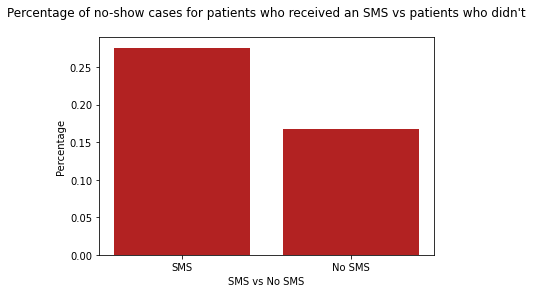

In [35]:
## Creating a bar chart to show the ratio of no show cases who received an SMS vs who didn't
myvalues2 = [sms_ratio, nosms_ratio]
mylabels = ['SMS', 'No SMS']
plt.title('Percentage of no-show cases for patients who received an SMS vs patients who didn\'t''\n')
plt.xlabel('SMS vs No SMS')
plt.ylabel('Percentage')
plt.bar(mylabels, height=myvalues2, color='firebrick');

##### There is a big issue here, the messages sent to the patients are inefective as almost 1 in 4 patients that receive the text message don't show up to their appointments compared to 1 in 6 for patients that don't receive it. So the clinic should try to find a different way to reach their patients.

### Question 4: Is there a correlation between no show & gender

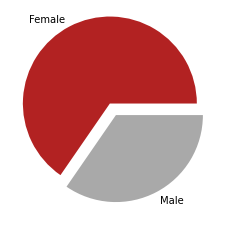

In [57]:
labels = ('Female', 'Male')
Explode = [0.15, 0]
plt.pie(df_noshow['Gender'].value_counts(), labels=labels, explode=Explode, colors=['firebrick', 'darkgray']);


##### It looks like women are twice as likely to miss their appointments than men, however, we have to explore the ratio of women to men in the data first to check the accuracy of this assumption

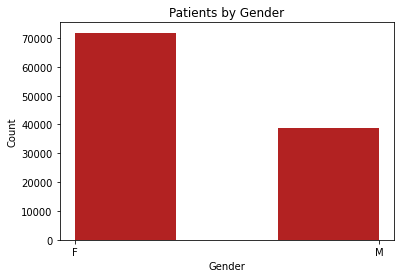

In [61]:
plt.hist(df['Gender'], bins=3, color='firebrick')
plt.title('Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Count');

In [58]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

##### After investigating this further, it seems like women are represented almost twice as much in our original dataset so it is normal that they are also represented twice as much in the no show dataset

## Conclusion:
    
    Results:
    
    1- The day with the most no-show cases is Tuesday and the day with the least is Saturday
    2- Our data suggests that the current SMS system is not working, as patients who receive an SMS are 18% more likely
    not show up (38% vs 20%)
    3- Scholarships do not affect percentage of people showing up, as our data suggests that patients who have a scholarship
    are almost 4% more likely to not show up to the appointment (23.7% vs 19.8%)
    4- There is no correlation between the gender of the patients and not showing up to the appointments, even though it might seem like there is
    
    Limitations:
    
    1- We can't form strong correlations because our dataset consists of mainly categorical data
    2- Some of our findings need more context to be more accurate. For example, the number of no-show cases on Saturdays
    is suspicious (just 1 case) so the clinic was probably closed on saturday which makes thursday the day with the 
    least no-show cases